In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd

In [3]:
df = pd.read_csv('notebook/08-Linear-Regression-Models/Advertising.csv')
df.head()
# these are different advertising channesl

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


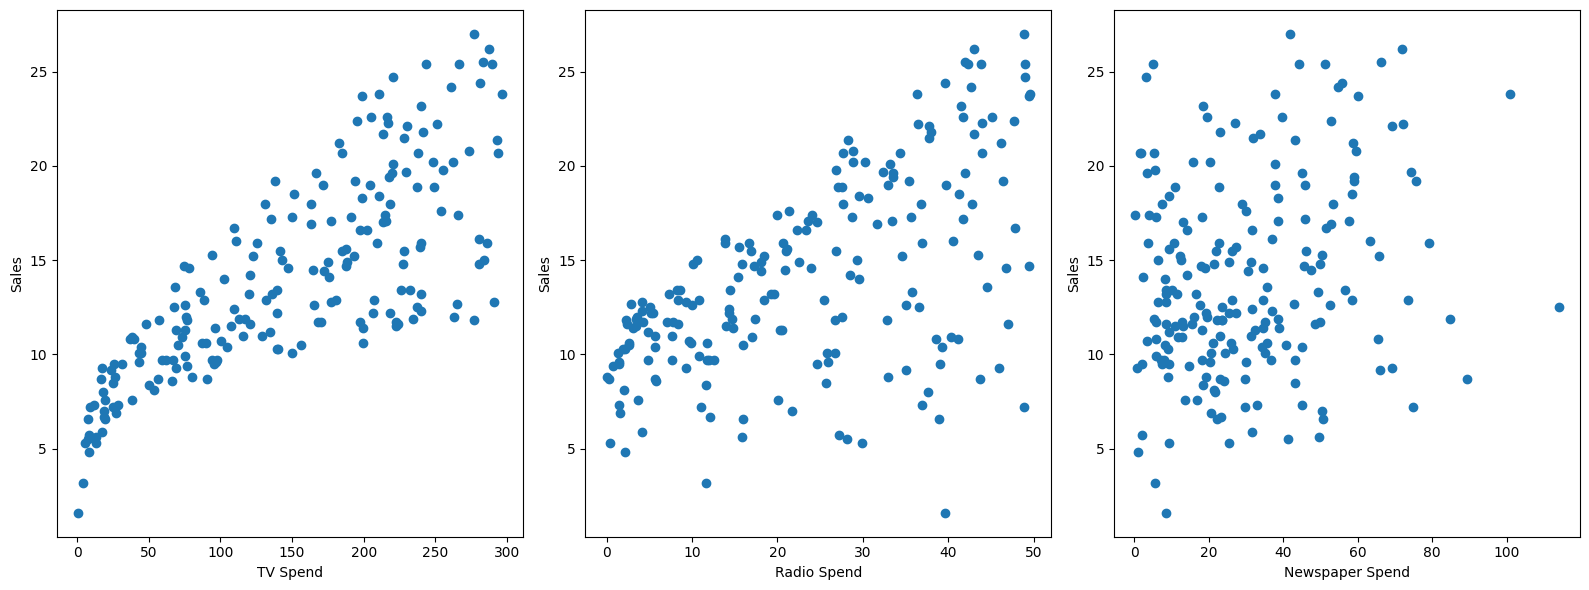

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].set_ylabel('Sales')
axes[0].set_xlabel('TV Spend')
                
axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].set_ylabel('Sales')
axes[1].set_xlabel('Radio Spend')

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].set_ylabel('Sales')
axes[2].set_xlabel('Newspaper Spend')                

plt.tight_layout()

In [9]:
# X represents all the features
X = df.drop('sales', axis = 1) # will drop the column
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [10]:
y = df['sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [11]:
# now we apply the train test split
# we dont want to evaluete on the same data it was trained so we need to seperate

from sklearn.model_selection import train_test_split


In [12]:
help(train_test_split) # at the bottom it has a full documentation

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to 

In [21]:
# This order must be constant 
# test_size - what % of data will be used to be tested
# random_state is the random seed
# much of the data is sorted by default
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) # this will automatically call a shuffle_split() to randomize the data and then grab % to test

X_train # train has 140 rows which is 30% of the dataset


,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [22]:
len(X_test) # this will be 60

60

In [23]:
from sklearn.linear_model import LinearRegression # we will import the model, in this case the linear regression
# n_jobs can increase the number of used cpus in calculations

In [24]:
model = LinearRegression() # will create the model as an object

In [25]:
# this will happen in place
model.fit(X_train, y_train) # the output reports back the model object

LinearRegression()

In [26]:
model.predict(X_test) # will report prediction for all X_test

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

1- Mean Absolute Error (MAE)
<br> 
Comapare the error with the true value <br> MAE wont pushin large errors (outliers)

2 - Mean Squared Error (MSE) <br>
In this case large errors will be punished
Error will be reported in units of y^2

3 - Root Mean Square Error (RMSE) <br>
This the root of the mean of the squared errors
Most popular since it has the same units as y

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
model.predict(X_test)

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [29]:
X_test.head()

,TV,radio,newspaper
37,74.7,49.4,45.7
109,255.4,26.9,5.5
31,112.9,17.4,38.6
89,109.8,47.8,51.4
66,31.5,24.6,2.2


In [31]:
y_test.head()

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
Name: sales, dtype: float64

In [32]:
# compare prediction with the acctual y results
test_predictions = model.predict(X_test)

In [33]:
# import these libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [34]:
df['sales'].mean() # average sales value

14.0225

<AxesSubplot:xlabel='sales', ylabel='Count'>

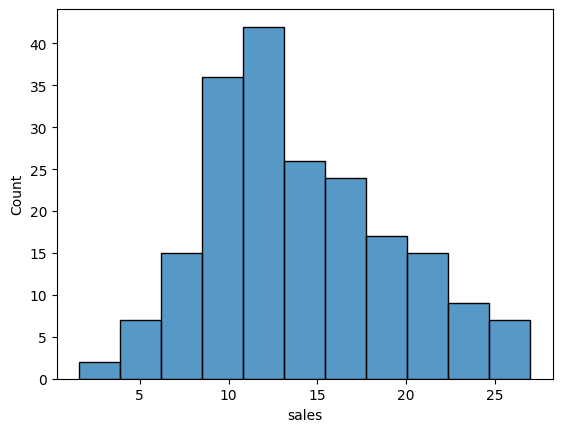

In [35]:
sns.histplot(data= df , x ='sales')

In [37]:
# now lets compare with absolute valeus
mean_absolute_error(y_test, test_predictions) # takes the test/true values and the prediction from the models
# this is a 10% error range, which isnt neither small or large
# this doesnt take into consideration outliers

1.213745773614481

In [40]:
# RMSE, this is the sd for your prediction, this will take into acc even the outliers
# If you got a good MSE and a high RMSE it means that your model has some points that are really off, take a look at the course book for a deeper dive
np.sqrt(mean_squared_error(y_test, test_predictions))

1.5161519375993884

# The residual error should be random and close to a normal distribution for our model to be fitting 

The residuals should be distributed close to 0

* we can also plot the residuals themselves against the y true value 
* the residual plot should have no clear defined set or curve
* in this case the dataset isnt valid for the linear model

In [41]:
# now lets find if the model is valid 
# y_test - the values used for the testing
# test_predictions - the values used for the prediction
test_residuals = y_test - test_predictions
test_residuals

37    -1.041313
109    0.189374
31     0.451111
89    -0.308198
66     0.327143
119   -0.412483
54    -0.089925
74    -0.299540
145    0.524155
142    0.878058
148   -1.505032
112    0.207650
174   -2.225411
55     2.412060
141    0.775434
149    0.118016
25    -3.552290
34     1.810863
170    0.843850
39     1.096888
172   -0.192152
153    0.757859
175    2.313681
61     1.378009
65     1.320379
50    -1.252073
42    -0.769259
129    1.647714
179    0.176840
2     -3.207197
12    -1.577578
133    0.355399
90     1.129731
22    -1.107800
41    -0.214921
32     1.832357
125    1.346067
196    1.421653
158   -3.281056
180   -0.135911
16    -0.510026
186    0.528079
144    1.185301
121   -1.045720
80     0.232893
18     1.216320
78    -3.698066
48    -1.453889
4     -0.339423
15     1.585066
1     -2.097274
43    -1.066159
102   -2.762851
164    0.754630
9     -1.962615
155   -2.308703
36     2.105349
190   -1.824097
33    -1.374000
45    -0.287857
Name: sales, dtype: float64

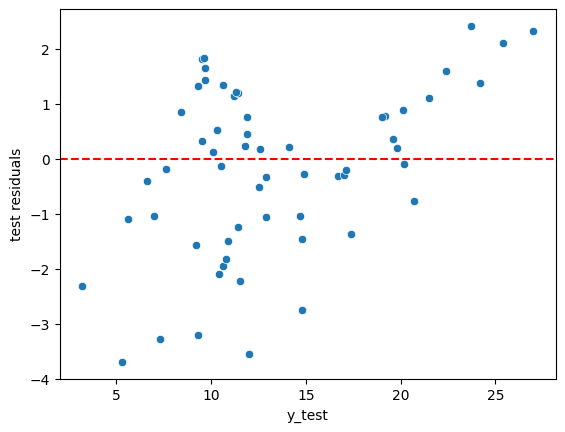

In [44]:
sns.scatterplot(x = y_test, y = test_residuals) 
plt.xlabel('y_test')
plt.ylabel('test residuals')
plt.axhline(y = 0, ls='--', color='red') # makes a horizontal line a y = number
# We should worry if we see a curve or a straight line or smth parabolic, in this case it seems that we dont have to worry

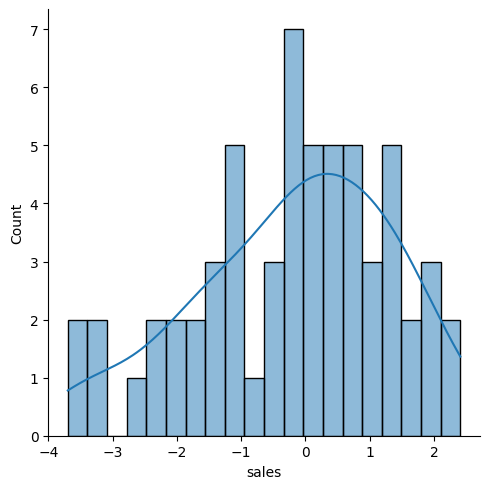

In [45]:
sns.displot(test_residuals, kde=True, bins = 20) # the mean is close to 0, we overshoot a bit

In [46]:
# we can test for normality
import scipy as sp

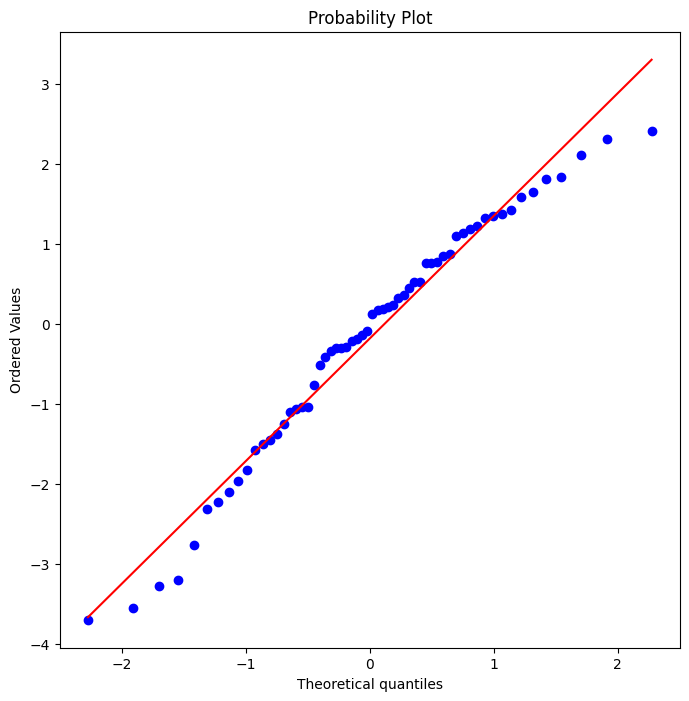

In [48]:
fig, ax = plt.subplots(figsize=(8,8), dpi=100)
_ = sp.stats.probplot(test_residuals, plot=ax)
# The red line shows what a normal distribution looks like, usseful for analyzing the residual plot

# Retraining and deploying the model

In [49]:
final_model = LinearRegression()
final_model.fit(X, y) # in this model we fit all the data since we have decided they are a good fit

LinearRegression()

In [51]:
final_model.coef_ # this will return the Beta coeffiecients 
                  # They come in the same order as the data we passed in
                  
# beta coef for TV (first one) 
# if we increase TV spending by 1 the increase in sales will be 0.04576465
# if we increase Radio spending by 1 sales will increase by 0.18853
# the increase with 1 means an increase by 1000 dollars

array([ 0.04576465,  0.18853002, -0.00103749])

In [52]:
X.head()
# The coeff for newspapers (last one) is almost 0. No matter what you spend in advertising the model will consider its effects as irrelevant. In this case
# newspaper spendings will lower the sales further. The newspaper scatterplot to sales looks random so the results make sense

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [55]:
y_hat = final_model.predict(X)

In the real world is important to normalize the datasets since not all data will be on the same rates

Text(0.5, 1.0, 'newspaper')

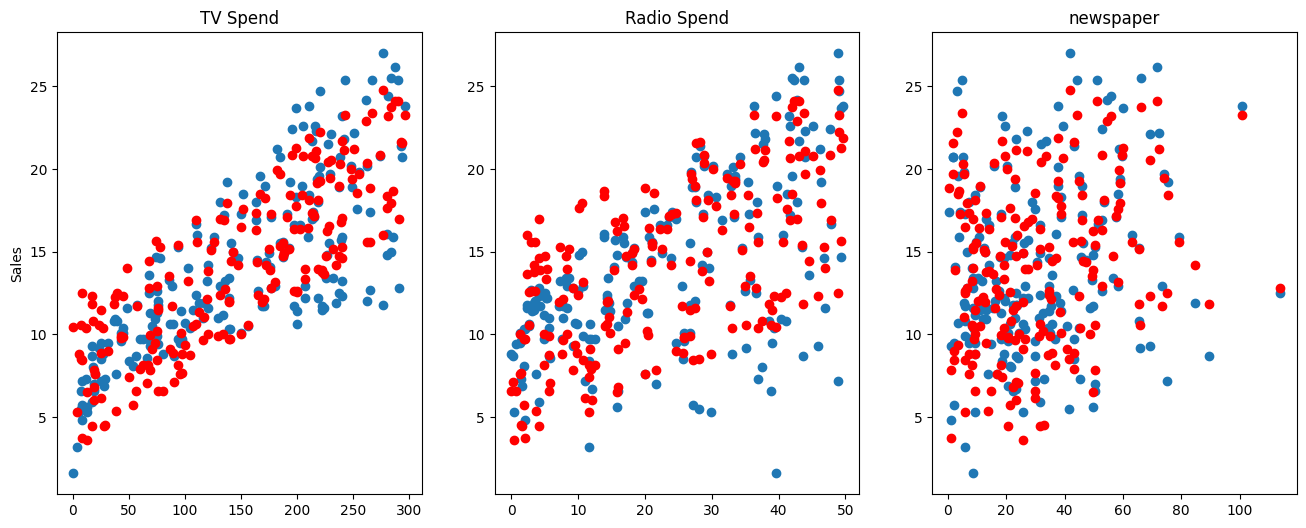

In [61]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].plot(df['TV'], y_hat, 'o', color='red')
axes[0].set_ylabel('Sales')
axes[0].set_title('TV Spend') # it can be shown that the fitting is good

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].plot(df['radio'], y_hat, 'o', color='red')
axes[1].set_title('Radio Spend')


axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].plot(df['newspaper'], y_hat, 'o', color='red')
axes[2].set_title('newspaper')

# The prediction seems to perform well in all cases

Deployment


In [62]:
from joblib import dump, load 

In [63]:
dump(final_model, 'final_sales_model.joblib')

['final_sales_model.joblib']

In [64]:
loaded_model = load('final_sales_model.joblib') # this model is already trained and it can be deployed
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [65]:
# now lets test for a new campaing
X.shape # the example campaing needs to have the same dimmesions

(200, 3)

In [66]:
# 149, 22, 12
campaign = [[149,22,12]]

In [67]:
loaded_model.predict(campaign) # the number of sales for this specific campaing

/home/zaimi/Desktop/python/venv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])